The program simulates a game from "Squid Game" called "Glass Bridge" where players cross a bridge made of planks, some of which are "pure" and the rest are "safe". The game starts with a certain number of planks, and each time a player steps on a plank, there is a chance that the plank will break. If a player falls, the game is over, and the next player starts from the beginning. 

The function `simulate_glass_bridge()` takes two arguments: the number of players and the number of planks in the bridge. It returns a list of probabilities that each player will pass the bridge successfully. 


The probability that player 1 will pass the bridge: 0.000%
Player 1 fell on plank 1



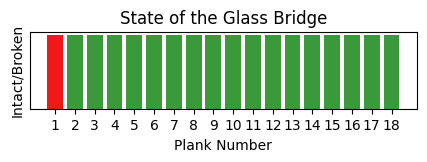


The probability that player 2 will pass the bridge: 0.001%
Player 2 fell on plank 3



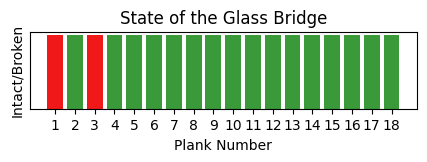


The probability that player 3 will pass the bridge: 0.002%
Player 3 fell on plank 2



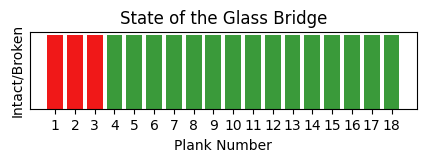


The probability that player 4 will pass the bridge: 0.003%
Player 4 fell on plank 4



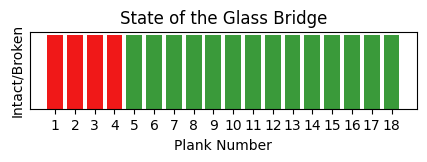


The probability that player 5 will pass the bridge: 0.006%
Player 5 fell on plank 6



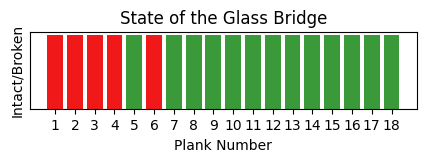


The probability that player 6 will pass the bridge: 0.012%
Player 6 fell on plank 11



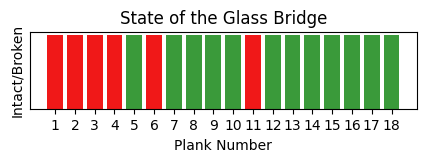


The probability that player 7 will pass the bridge: 0.024%
Player 7 fell on plank 5



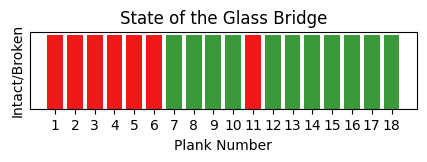


The probability that player 8 will pass the bridge: 0.049%
Player 8 fell on plank 7



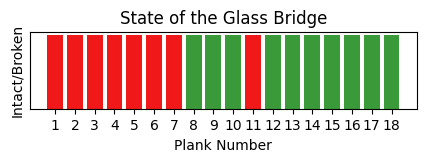


The probability that player 9 will pass the bridge: 0.098%
Player 9 fell on plank 12



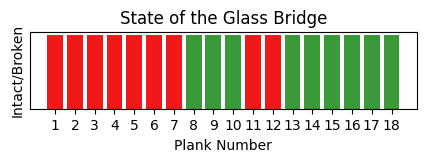


The probability that player 10 will pass the bridge: 0.195%
Player 10 fell on plank 15



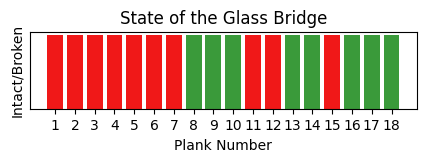


The probability that player 11 will pass the bridge: 0.391%
Player 11 fell on plank 14



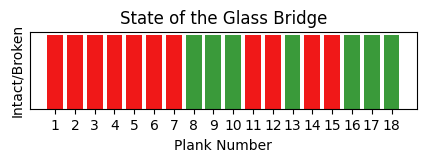


The probability that player 12 will pass the bridge: 0.781%
Player 12 fell on plank 9



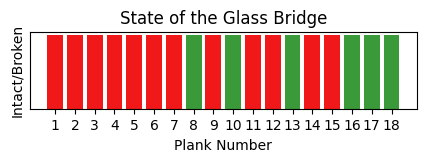


The probability that player 13 will pass the bridge: 1.562%
Player 13 fell on plank 8



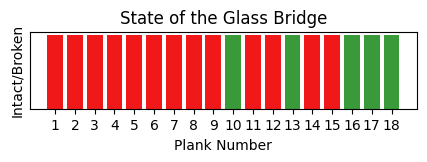


The probability that player 14 will pass the bridge: 3.125%
Player 14 fell on plank 13



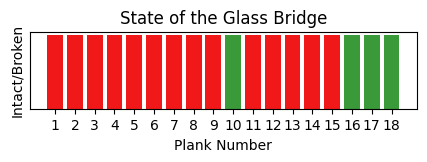


The probability that player 15 will pass the bridge: 6.250%
Player 15 fell on plank 10



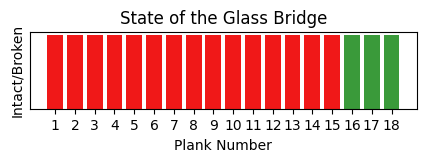


The probability that player 16 will pass the bridge: 12.500%
Player 16 passed all the planks



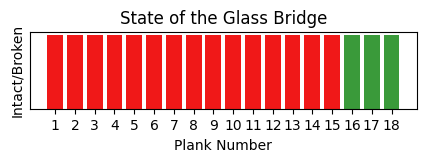

In [ ]:
import random
from functools import reduce

import matplotlib.pyplot as plt

def simulate_glass_bridge(num_players, num_planks):
    # Initialize the game state
    plank_numbers = list(range(1, num_planks + 1))
    bridge = ["safe"] * num_planks
    broken_planks = [False] * num_planks
    num_pure = 7
    pure_indices = random.sample(range(num_planks), num_pure)
    bridge = list(map(lambda x: "pure" if x in pure_indices else "safe", range(num_planks)))
    probabilities = []

    # Simulate the game process
    for player in range(num_players):

        planks_prob = map(lambda x: 1 if x else 0.5, broken_planks)
        probabilities.append(reduce(lambda x, y: x * y, planks_prob))
        print(f"The probability that player {player+1} will pass the bridge: {probabilities[player]:.3%}")
        
        # Player i is crossing the bridge
        num_plank = 0;
        for plank in range(num_planks):
            if broken_planks[plank] == False:
                outcome = random.choice([True, False])
                if outcome == False:
                    print(f"Player {player+1} fell on plank {plank+1}")
                    broken_planks[plank] = True
                    break
        else:
            print(f"Player {player+1} passed all the planks")

        # Display the state of the glass bridge after player
        print()
        plt.figure(figsize=(5, 1))
        plt.bar(plank_numbers, [0 if item else 1 for item in broken_planks], color='#3A9A3A') # intact
        plt.bar(plank_numbers, [1 if item else 0 for item in broken_planks], color='#F01818') # broken
        plt.title("State of the Glass Bridge")
        plt.xlabel("Plank Number")
        plt.ylabel("Intact/Broken")
        plt.xticks(plank_numbers)
        plt.yticks([])
        plt.show()
        print()

    return probabilities
        
num_players = 16
num_planks = 18
probabilities = simulate_glass_bridge(num_players, num_planks)